In [1]:
 #importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Foodtrain/train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Foodtrain/test'

In [4]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150),batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size =(150,150), batch_size = 10, class_mode = 'categorical')

Found 99 images belonging to 10 classes.
Found 99 images belonging to 10 classes.


In [5]:
train_dataset.class_indices

{'banhbao': 0,
 'banhbeo': 1,
 'banhcanh': 2,
 'banhuot': 3,
 'banhxeo': 4,
 'bunbo': 5,
 'bunrieu': 6,
 'comtam': 7,
 'hutieu': 8,
 'pho': 9}

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [8]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
10/10 [==============================] - 72s 7s/step - loss: 2.8668 - accuracy: 0.1010 - val_loss: 2.3348 - val_accuracy: 0.1010
Epoch 2/50
10/10 [==============================] - 4s 417ms/step - loss: 2.3356 - accuracy: 0.0505 - val_loss: 2.3006 - val_accuracy: 0.1212
Epoch 3/50
10/10 [==============================] - 4s 429ms/step - loss: 2.3262 - accuracy: 0.0909 - val_loss: 2.2903 - val_accuracy: 0.1414
Epoch 4/50
10/10 [==============================] - 4s 416ms/step - loss: 2.2951 - accuracy: 0.1010 - val_loss: 2.2787 - val_accuracy: 0.1111
Epoch 5/50
10/10 [==============================] - 4s 430ms/step - loss: 2.2942 - accuracy: 0.1212 - val_loss: 2.2713 - val_accuracy: 0.1313
Epoch 6/50
10/10 [==============================] - 4s 435ms/step - loss: 2.2774 - accuracy: 0.1616 - val_loss: 2.2617 - val_accuracy: 0.1515
Epoch 7/50
10/10 [==============================] - 4s 426ms/step - loss: 2.2710 - accuracy: 0.1414 - val_loss: 2.2486 - val_accuracy: 0.1313
Epoch 8/

In [10]:
model.save('/content/drive/MyDrive/Foodtrain/Foodtrain.h5')

In [11]:
Fruittrain_model = load_model('/content/drive/MyDrive/Foodtrain/Foodtrain.h5')

In [12]:
score=Fruittrain_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

10/10 [==============================] - 2s 193ms/step - loss: 0.0310 - accuracy: 0.9899
Test loss =  0.03098798543214798
Test accuracy =  0.9898989796638489


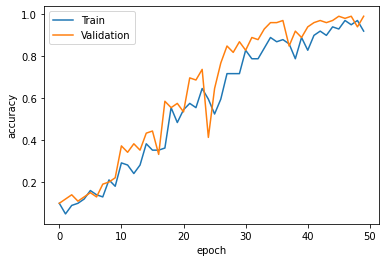

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  banhbao


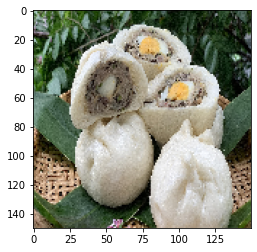

In [15]:
img = load_img('/content/drive/MyDrive/Foodtrain/Predict/1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['banhbao',
 'banhbeo',
 'banhcanh',
 'banhuot',
 'banhxeo',
 'bunbo',
 'bunrieu',
 'comtam',
 'hutieu',
 'pho']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

Object:  banhbeo


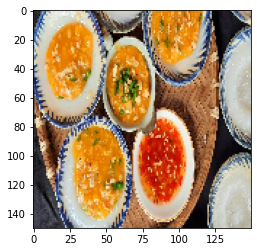

In [16]:
img = load_img('/content/drive/MyDrive/Foodtrain/Predict/2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['banhbao',
 'banhbeo',
 'banhcanh',
 'banhuot',
 'banhxeo',
 'bunbo',
 'bunrieu',
 'comtam',
 'hutieu',
 'pho']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

Object:  bunbo


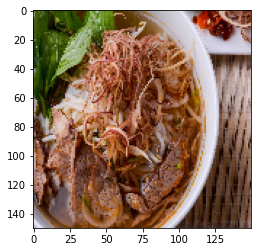

In [17]:
img = load_img('/content/drive/MyDrive/Foodtrain/Predict/3.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['banhbao',
 'banhbeo',
 'banhcanh',
 'banhuot',
 'banhxeo',
 'bunbo',
 'bunrieu',
 'comtam',
 'hutieu',
 'pho']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

Object:  pho


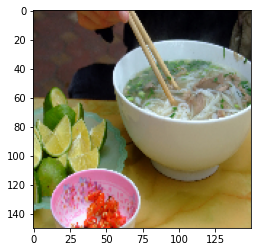

In [18]:
img = load_img('/content/drive/MyDrive/Foodtrain/Predict/4.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['banhbao',
 'banhbeo',
 'banhcanh',
 'banhuot',
 'banhxeo',
 'bunbo',
 'bunrieu',
 'comtam',
 'hutieu',
 'pho']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

In [19]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Foodtrain.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-24 18:28:03--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-24 18:28:03 (35.9 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Foodtrain.ipynb to pdf
[NbConvertApp] Support files will be in Foodtrain_files/
[NbConvertApp] Making directory ./Foodtrain_files
[NbConvertApp] Making directory ./Foodtrain_fil

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'